# Principal Component Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

In [2]:
data_for_model = pd.read_csv("C:/Users/vatsal/Desktop/machine learning/model builidng/data/sample_data_pca.csv")
data_for_model

,user_id,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
0,1,1,0.0000,0.0891,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0001,0.0606,0.0000,0.0000,0.0578,0.1554,0.0001,0.0000,0.0000
1,2,0,0.0000,0.0000,0.0,0.0,0.0000,0.0001,0.0,0.0,...,0.0008,0.0000,0.0016,0.0000,0.0000,0.0000,0.0030,0.0034,0.8695,0.0037
2,3,1,0.0002,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7179,0.0000,0.0008
3,4,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0146,0.0275,0.0060,0.0000,0.1724,0.0000,0.0021,0.0012,0.0000,0.0000
4,5,1,0.0006,0.0000,0.0,0.0,0.0000,0.0002,0.0,0.0,...,0.0310,0.1061,0.0000,0.0000,0.0010,0.0000,0.6773,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,352,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0000,0.0002,0.0066,0.0001,0.0000,0.6765,0.0420,0.0000,0.0000
352,353,1,0.0000,0.0000,0.0,0.0,0.1759,0.0000,0.0,0.0,...,0.0000,0.0000,0.0000,0.0015,0.0001,0.0007,0.0002,0.0000,0.0032,0.1227
353,354,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0010,0.7944,0.0000,0.0000,0.0000
354,355,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0061,0.0000,0.3138,0.0000,0.0000,0.0000,0.0000,0.0163,0.0000


In [3]:
data_for_model.drop("user_id", axis =1, inplace=True)
data_for_model

,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,artist9,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
0,1,0.0000,0.0891,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0001,0.0606,0.0000,0.0000,0.0578,0.1554,0.0001,0.0000,0.0000
1,0,0.0000,0.0000,0.0,0.0,0.0000,0.0001,0.0,0.0,0.0000,...,0.0008,0.0000,0.0016,0.0000,0.0000,0.0000,0.0030,0.0034,0.8695,0.0037
2,1,0.0002,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7179,0.0000,0.0008
3,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,...,0.0146,0.0275,0.0060,0.0000,0.1724,0.0000,0.0021,0.0012,0.0000,0.0000
4,1,0.0006,0.0000,0.0,0.0,0.0000,0.0002,0.0,0.0,0.0000,...,0.0310,0.1061,0.0000,0.0000,0.0010,0.0000,0.6773,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0002,0.0066,0.0001,0.0000,0.6765,0.0420,0.0000,0.0000
352,1,0.0000,0.0000,0.0,0.0,0.1759,0.0000,0.0,0.0,0.0162,...,0.0000,0.0000,0.0000,0.0015,0.0001,0.0007,0.0002,0.0000,0.0032,0.1227
353,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0010,0.7944,0.0000,0.0000,0.0000
354,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0061,0.0000,0.3138,0.0000,0.0000,0.0000,0.0000,0.0163,0.0000


In [4]:
#shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [5]:
#Class Balance

data_for_model["purchased_album"].value_counts(normalize=True)

1    0.533708
0    0.466292
Name: purchased_album, dtype: float64

In [6]:
data_for_model.isna().sum().sum()
data_for_model.dropna(how="any", inplace=True)
data_for_model

,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,artist9,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
227,1,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0045,0.0000,0.2887,0.0000,0.0000,0.0000,0.0000,0.0136,0.0000
42,1,0.0278,0.0000,0.0000,0.0000,0.0,0.0036,0.0002,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1894,0.0000,0.0000,0.0000
256,1,0.0000,0.0000,0.0367,0.0053,0.0,0.0000,0.0367,0.0000,0.0,...,0.0000,0.0002,0.0000,0.0002,0.0000,0.0001,0.0000,0.0243,0.0000,0.0005
182,1,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0011,0.8431,0.0000,0.0000,0.0000
56,1,0.0007,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0011,0.0163,0.0000,0.0000,0.0000,0.0000,0.0000,0.0179,0.8111,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0.0099,0.0000,0.0000,0.0000,0.0,0.0006,0.0000,0.0000,0.0,...,0.0001,0.0851,0.0000,0.4204,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
106,0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.1069,0.0000,0.0000,0.0890,0.0000,0.0000,0.0000,0.0138
270,1,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0817,0.0000,0.0035,0.0000,0.0168,0.0184,0.0251
348,0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0034,0.0,...,0.0004,0.0000,0.6866,0.0000,0.0000,0.0029,0.0000,0.0003,0.0183,0.0029


In [7]:
#split input variables & output variables

X = data_for_model.drop(["purchased_album"], axis = 1)
y = data_for_model["purchased_album"]
X, y

(     artist1  artist2  artist3  artist4  artist5  artist6  artist7  artist8  \
 227   0.0000   0.0000   0.0000   0.0000      0.0   0.0000   0.0000   0.0000   
 42    0.0278   0.0000   0.0000   0.0000      0.0   0.0036   0.0002   0.0000   
 256   0.0000   0.0000   0.0367   0.0053      0.0   0.0000   0.0367   0.0000   
 182   0.0000   0.0000   0.0000   0.0000      0.0   0.0000   0.0000   0.0000   
 56    0.0007   0.0000   0.0000   0.0000      0.0   0.0000   0.0000   0.0000   
 ..       ...      ...      ...      ...      ...      ...      ...      ...   
 71    0.0099   0.0000   0.0000   0.0000      0.0   0.0006   0.0000   0.0000   
 106   0.0000   0.0000   0.0000   0.0000      0.0   0.0000   0.0000   0.0000   
 270   0.0000   0.0000   0.0000   0.0000      0.0   0.0000   0.0000   0.0000   
 348   0.0000   0.0000   0.0000   0.0000      0.0   0.0000   0.0000   0.0034   
 102   0.0023   0.0011   0.0001   0.0000      0.0   0.0000   0.0000   0.0009   
 
      artist9  artist10  ...  artist91

In [8]:
#split out Training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify= y)
X_train

,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,artist9,artist10,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
301,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.8442,0.0045,0.0000,0.0086,0.0000,0.0000
210,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0699,0.0,0.0000,...,0.0029,0.0000,0.0000,0.3569,0.0000,0.1974,0.0035,0.0000,0.0003,0.0000
28,0.0000,0.0000,0.0198,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.0000,0.0000,0.3090,0.0000,0.0114,0.0000,0.0000,0.0000,0.0825
72,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.0215,0.0017,0.0071,0.0000,0.0019,0.0000,0.0000,0.0000,0.0000
178,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0006,...,0.0000,0.0025,0.0000,0.3184,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.0007,0.0008,0.0000,0.0000,0.0,0.0000,0.0,0.0016,0.0,0.0000,...,0.0000,0.1629,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
238,0.0000,0.0000,0.0000,0.0000,0.0,0.0015,0.0,0.0000,0.0,0.0000,...,0.0000,0.0000,0.0006,0.0000,0.0000,0.0000,0.9357,0.0000,0.0000,0.0000
329,0.0000,0.0000,0.0003,0.0044,0.0,0.0000,0.0,0.0000,0.0,0.0000,...,0.0119,0.0000,0.0000,0.0000,0.0000,0.0002,0.7743,0.0000,0.0010,0.0001
207,0.0079,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,...,0.0000,0.0000,0.0359,0.0000,0.0000,0.0000,0.0000,0.0000,0.0009,0.0000


In [9]:
# feature scaling

scale_standard = StandardScaler()
X_train = scale_standard.fit_transform(X_train)
X_test = scale_standard.transform(X_test)

In [10]:
#APPLY PCA
## Instantiate & fit

pca = PCA(n_components = None, random_state = 42)
pca.fit(X_train)

PCA(random_state=42)

In [11]:
##Extract the explained variance across components
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = pca.explained_variance_ratio_.cumsum()

In [12]:
#Plot the explained variance across components
## create list for number of components

num_vars_list = list(range(1,101))
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

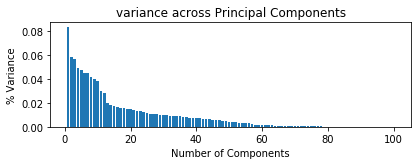

In [13]:
#plot the variance explained by each component
plt.subplot(2,1,1)
plt.bar(num_vars_list, explained_variance)
plt.title("variance across Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% Variance")
plt.tight_layout()

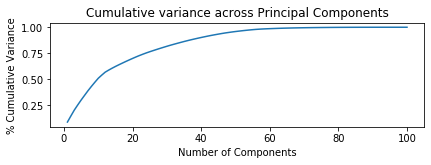

In [14]:
#plot the cumulative variance
plt.subplot(2,1,2)
plt.plot(num_vars_list, explained_variance_cumulative)
plt.title("Cumulative variance across Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% Cumulative Variance")
plt.tight_layout()
plt.show()

In [16]:
# Apply PCA with selected number of components
pca = PCA(n_components = 0.75, random_state = 42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train, X_test

(array([[-0.4021941 , -0.75699883,  0.21924717, ..., -0.56664223,
         -0.41440343,  0.04620154],
        [-0.36007213, -1.13108387,  0.40324893, ..., -0.46272509,
         -0.34788525, -0.02662821],
        [10.69293403, -0.86657383,  0.71198676, ..., -0.97628781,
         -0.65732814,  0.67192131],
        ...,
        [ 1.00197218, -1.66885784,  0.63427027, ...,  0.51191416,
         -0.20563427,  0.0287981 ],
        [-0.75303097,  3.75845543, -3.87202645, ..., 13.56452969,
          0.25085315, -6.78763525],
        [-0.48844855, -0.58581165,  0.03826661, ..., -0.5792479 ,
         -0.29403198,  0.72815261]]),
 array([[-5.82088598e-01,  1.64462820e+00, -2.19296152e+00,
         -5.85609359e-01, -1.69698205e+00, -8.95106844e-01,
         -1.35574714e+00,  1.58517637e+00, -1.70397365e+00,
          8.93127839e-01,  7.82640668e-01,  5.88340590e+00],
        [ 1.78627530e+00, -3.79863157e+00,  1.50650409e+00,
         -2.65668701e+00, -2.72520495e-01, -4.01307265e+00,
         -9.

In [17]:
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Assess Model Accuracy
y_pred_class = clf.predict(X_test)
accuracy_score(y_test, y_pred_class)

0.9166666666666666

# Analysis


From the graphs of variance across principal components and cumulative variance, we can observe that a smooth curve is obtained and the ideal number of components is between 20 and 25 at 0.75% 0f cumulative variance.

For the PCA model, we obtained more than 90% accuracy which is very much better than Linear and Logistic Regression 